In [1]:
import xarray as xr
import matplotlib.pyplot as plt

xt_ocean = longitude

yt_ocean = latitude

st_ocean = depth

In [2]:
ds_ocean = xr.open_dataset("mariesostseelauf/1961/ocean_day3d.nc") # change your path accordingly
ds_ice = xr.open_dataset("mariesostseelauf/1961/ice_day.nc")

# Plot surface salt

In [3]:
salt = ds_ocean.salt

In [4]:
surface_salt_first_timestep = salt.isel(time=0, st_ocean=0) #index selection

In [5]:
surface_salt_first_timestep

<xarray.DataArray 'salt' (yt_ocean: 102, xt_ocean: 91)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 8.12 8.36 8.6 8.84 ... 29.0 29.24 29.48 29.72
  * yt_ocean  (yt_ocean) float64 53.64 53.76 53.88 54.0 ... 65.52 65.64 65.76
    time      object 1961-02-01 12:00:00
    st_ocean  float64 0.25
    geolon_t  (yt_ocean, xt_ocean) float32 ...
    geolat_t  (yt_ocean, xt_ocean) float32 ...
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_salinity

Text(0.5, 1.0, 'Surface salinity first model timestep')

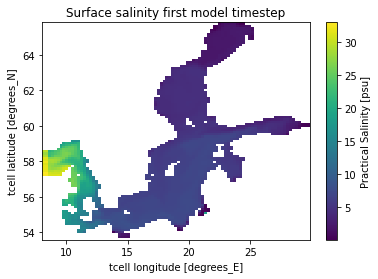

In [6]:
ax = plt.axes()
surface_salt_first_timestep.plot()
ax.set_title("Surface salinity first model timestep")

In [7]:
difference_surface_salt_begin_end = salt.isel(time = 4, st_ocean = 0) - surface_salt_first_timestep

Text(0.5, 1.0, 'Difference between timestep 4 and 0')

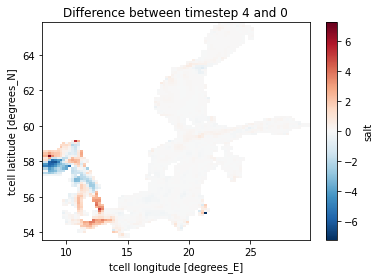

In [8]:
ax = plt.axes()
difference_surface_salt_begin_end.plot()
ax.set_title("Difference between timestep 4 and 0")

**Task**: Repeat the same analysis for surface temperature.

# Ice Mass

In [9]:
ice_mass = ds_ice.MI

In [10]:
ice_mass

<xarray.DataArray 'MI' (time: 5, yt: 102, xt: 91)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 8.12 8.36 8.6 8.84 9.08 ... 29.0 29.24 29.48 29.72
  * yt       (yt) float64 53.64 53.76 53.88 54.0 ... 65.4 65.52 65.64 65.76
  * time     (time) object 1961-02-01 12:00:00 ... 1961-02-05 12:00:00
Attributes:
    long_name:      ice mass
    units:          kg/m^2
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

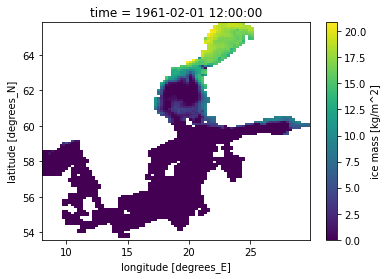

In [11]:
ice_mass.isel(time=0).plot()

Text(0.5, 1.0, 'Difference in ice mass between day 0 and day 4')

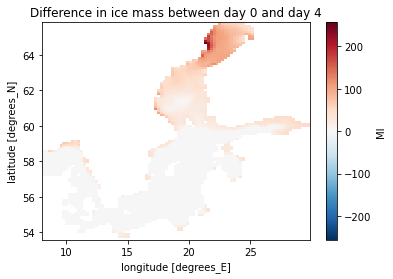

In [12]:
ax = plt.axes()
(ice_mass.isel(time=4)-ice_mass.isel(time=0)).plot()
ax.set_title("Difference in ice mass between day 0 and day 4")

The ice mass is growing quickly, apparently our intial conditions for the sea ice have been quite off.

## Central Baltic Sea

In [13]:
gotland = ds_ocean.salt.sel(xt_ocean = 20.05, yt_ocean = 57.12, method="nearest")

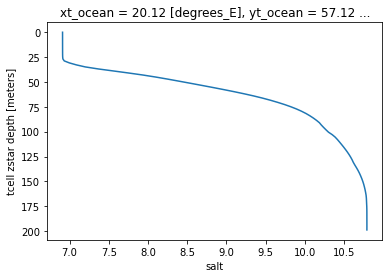

In [21]:
ax = plt.axes()
gotland.mean("time").plot(y="st_ocean")
ax.invert_yaxis()

**Question:** There is a strong stratification in the Baltic Sea. Why is that?